In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df = pd.read_csv("Reviews.csv")

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Step 1: Data Preparation

# Load dataset and take the first 10,000 rows
df = df.head(10000)[['Text', 'Score']]

# Convert 'Score' values to binary (positive/negative)
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Split text into words
df['Text'] = df['Text'].astype(str).str.split()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Join words back for TF-IDF vectorization
df['Text'] = df['Text'].apply(lambda x: ' '.join(x))

max_features = 5000
max_len = 100

# 初始化 Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Text'])

# 将文本转换为整数序列
sequences = tokenizer.texts_to_sequences(df['Text'])

# 填充序列，使其长度相同
X = pad_sequences(sequences, maxlen=max_len)

y = df['Score'].values

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.7))
cnn_model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# 编译模型
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
# cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhuangjunrong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/5
100/100 [==============================] - 4s 33ms/step - loss: 0.5362 - accuracy: 0.7633 - val_loss: 0.4339 - val_accuracy: 0.7837
Epoch 2/5
100/100 [==============================] - 3s 28ms/step - loss: 0.3765 - accuracy: 0.8247 - val_loss: 0.3771 - val_accuracy: 0.8419
Epoch 3/5
100/100 [==============================] - 3s 28ms/step - loss: 0.2521 - accuracy: 0.8920 - val_loss: 0.3683 - val_accuracy: 0.8606
Epoch 4/5
100/100 [==============================] - 3s 27ms/step - loss: 0.1876 - accuracy: 0.9270 - val_loss: 0.4856 - val_accuracy: 0.8219
Epoch 5/5
100/100 [==============================] - 3s 25ms/step - loss: 0.1418 - accuracy: 0.9481 - val_loss: 0.5339 - val_accuracy: 0.8450


In [6]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

lstm_history

Epoch 1/5
100/100 [==============================] - 5s 44ms/step - loss: 0.4953 - accuracy: 0.7792 - val_loss: 0.3767 - val_accuracy: 0.8281
Epoch 2/5
100/100 [==============================] - 4s 37ms/step - loss: 0.2833 - accuracy: 0.8822 - val_loss: 0.3432 - val_accuracy: 0.8525
Epoch 3/5
100/100 [==============================] - 3s 35ms/step - loss: 0.1829 - accuracy: 0.9323 - val_loss: 0.3921 - val_accuracy: 0.8438
Epoch 4/5
100/100 [==============================] - 3s 33ms/step - loss: 0.1286 - accuracy: 0.9556 - val_loss: 0.4515 - val_accuracy: 0.8300
Epoch 5/5
100/100 [==============================] - 3s 34ms/step - loss: 0.0933 - accuracy: 0.9686 - val_loss: 0.5193 - val_accuracy: 0.8413


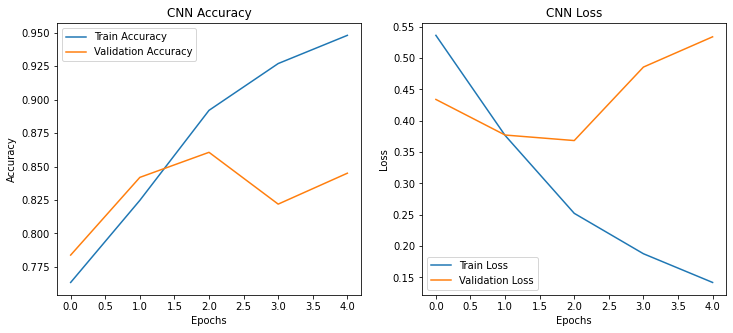

In [8]:

# Step 3: Plot Accuracy and Loss

# Plot CNN Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



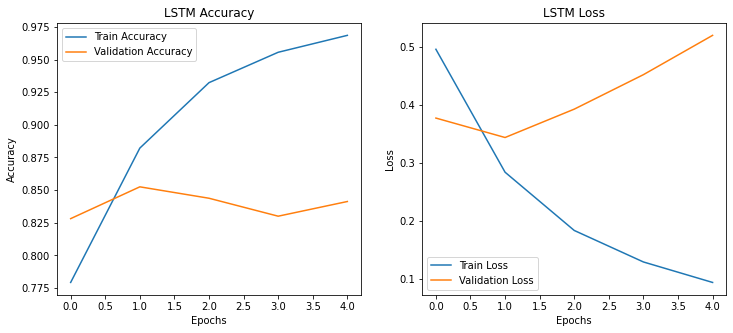

In [7]:

# Plot LSTM Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [9]:
# Step 3: Model Evaluation with Test Data
# cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test)

#print(f"CNN Test Accuracy: {cnn_test_accuracy:.2f}")
#print(f"LSTM Test Accuracy: {lstm_test_accuracy:.2f}")

63/63 [==============================] - 1s 9ms/step - loss: 0.5359 - accuracy: 0.8290
